<a href="https://colab.research.google.com/github/Alyona18/intelligent-systems-HW/blob/main/second/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from gensim import models

!pip install dataget
import dataget

In [3]:
import sys
!{sys.executable} -m pip install cmake==3.17.0
!{sys.executable} -m pip install MulticoreTSNE
!{sys.executable} -m pip install umap-learn

from MulticoreTSNE import MulticoreTSNE as tsne
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA
from umap import UMAP

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [4]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-11-19 18:18:54--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.203.240
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.203.240|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [5]:
!gzip -d GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [6]:
w = models.KeyedVectors.load_word2vec_format(
    '/content/GoogleNews-vectors-negative300.bin', binary=True)

In [7]:
w_vectors = w.wv.vectors
w_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(3000000, 300)

In [8]:
pre_mnist = load_digits()
mnist = pd.DataFrame(pre_mnist.data)

In [9]:
__,__, f_mnist_x_test, f_mnist_y_test = dataget.image.fashion_mnist().get()


In [10]:
f_mnist = f_mnist_x_test.reshape(-1, 28*28)

In [11]:
import scipy.io

mat = scipy.io.loadmat("/content/drive/MyDrive/COIL20.mat")
coil20 = mat['X']
coil20.shape



(1440, 1024)

In [12]:
umap = UMAP()
tsne = tsne(n_jobs=-1, random_state=2)
pca = PCA(n_components=2)

Text(0.5, 1.0, 'f-MNIST')

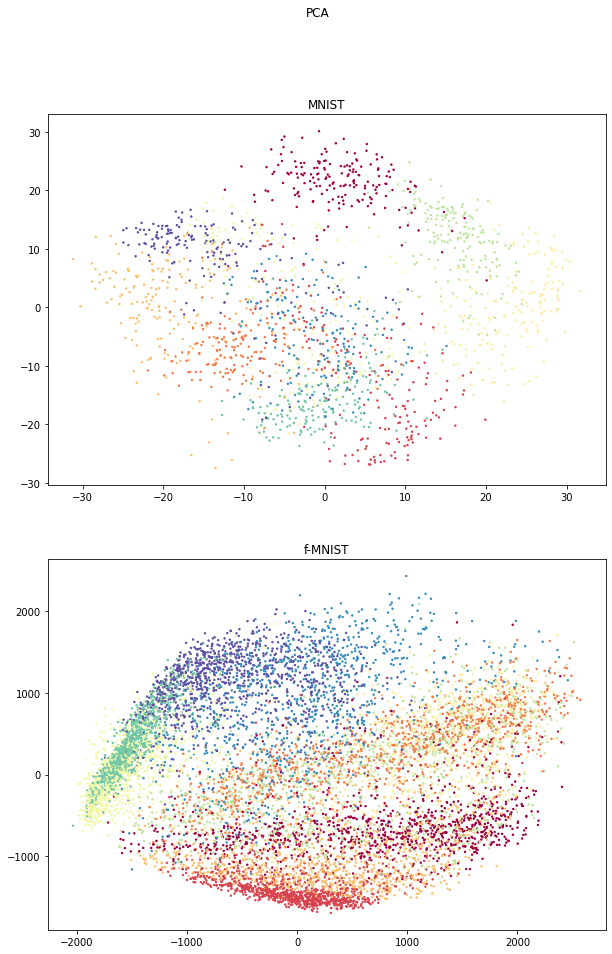

In [13]:
fig, axs = plt.subplots(2, figsize=(10, 15))
fig.suptitle('PCA')
embedding_pca_mnist = pca.fit_transform(mnist)

axs[0].scatter(embedding_pca_mnist[:,0], embedding_pca_mnist[:,1], 
                         cmap = 'Spectral', s = 2, c = pre_mnist.target)
axs[0].set_title('MNIST')

embedding_pca_f_mnist = pca.fit_transform(f_mnist)
axs[1].scatter(embedding_pca_f_mnist[:,0], 
                           embedding_pca_f_mnist[:,1], cmap = 'Spectral', s = 2, c = f_mnist_y_test)
axs[1].set_title('f-MNIST')


In [1]:
fig, axs = plt.subplots(2, figsize=(10, 15))
fig.suptitle('PCA')
embedding_pca_coil20 = pca.fit_transform(coil20)

axs[0].scatter(embedding_pca_coil20[:,0], embedding_pca_coil20[:,1], 
                         cmap = 'Spectral', s = 2, c = mat['Y'])
axs[0].set_title('Coil20')


embedding_pca_G_news = pca.fit_transform(w_vectors)
#axs[1].scatter(embedding_pca_f_mnist[:,0], 
#                           embedding_pca_f_mnist[:,1], cmap = 'Spectral', s = 2, c = f_mnist_y_test)
#axs[1].set_title('f-MNIST')


NameError: ignored